In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

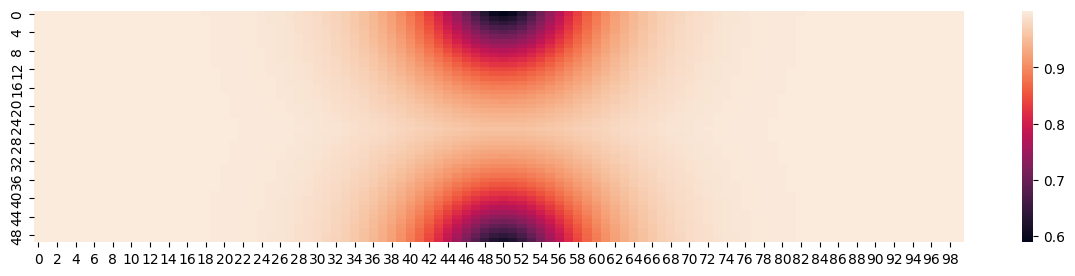

In [2]:
from constants import discrete_K

plt.figure(figsize=(15,3))
sns.heatmap(discrete_K().T)
plt.show()

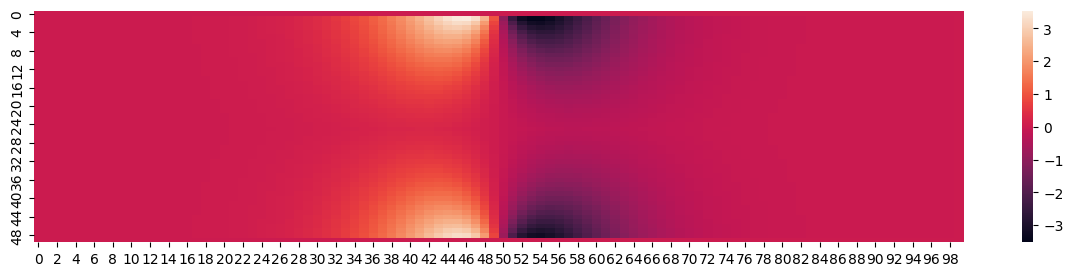

In [3]:
from jacobi import StationaryGrid

def p_l(x):
  return 10

def p_r(x):
  return 9

g = StationaryGrid(p_l, p_r, n=100, m=50)
p_initial = g.p.copy()
g.calc_div()

plt.figure(figsize=(15,3))
sns.heatmap(g.div.T)
plt.show()

step 0, max divergence is 3.522814022002439
step 50, max divergence is 1.993775113293067
step 100, max divergence is 1.2007893679559418
step 150, max divergence is 0.8421610101162269
step 200, max divergence is 0.6396433701746185
step 250, max divergence is 0.5081317383764421
step 300, max divergence is 0.4133028265292401
step 350, max divergence is 0.3413047412539631
step 400, max divergence is 0.2836939536279761
step 450, max divergence is 0.23734711634824257
step 500, max divergence is 0.19947657945306824
step 550, max divergence is 0.16809949190272305
step 600, max divergence is 0.1419905354284328
step 650, max divergence is 0.12018178861427509
step 700, max divergence is 0.10190301415556377
step 750, max divergence is 0.08653688916517421
step 800, max divergence is 0.0735852819383701
step 850, max divergence is 0.06264367031643372
step 900, max divergence is 0.05338159480720764
step 950, max divergence is 0.04552761172856071
step 1000, max divergence is 0.038857628327245264
step 1

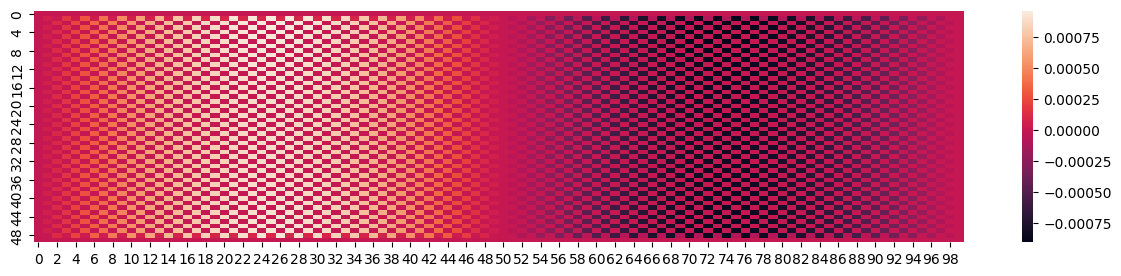

In [4]:
g.iterate(criterion="div")
g.calc_div()

plt.figure(figsize=(15,3))
sns.heatmap(g.div.T)
plt.show()

In [5]:
g.eps

3.857776320614903e-08

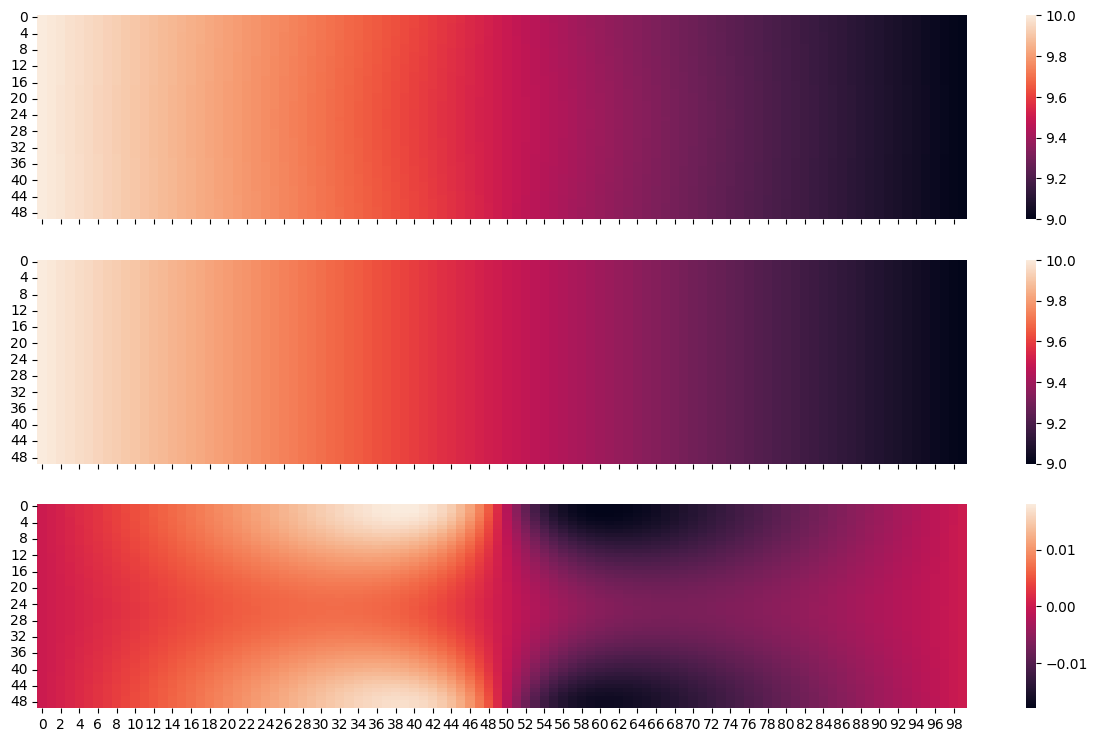

In [5]:
fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(15,9))

sns.heatmap(g.p.T, ax=axs[0])
sns.heatmap(p_initial.T, ax=axs[1])
sns.heatmap(g.p.T - p_initial.T, ax=axs[2])

plt.show()

In [6]:
from non_stationary import NonStationaryGrid
def p_l(t,z):
  return 10

def p_r(t,z):
  return 9

ns_grid = NonStationaryGrid(p_l, p_r, p_0=g.p)

In [7]:
ns_grid.iterate()

100%|██████████| 999/999 [00:08<00:00, 120.10it/s]


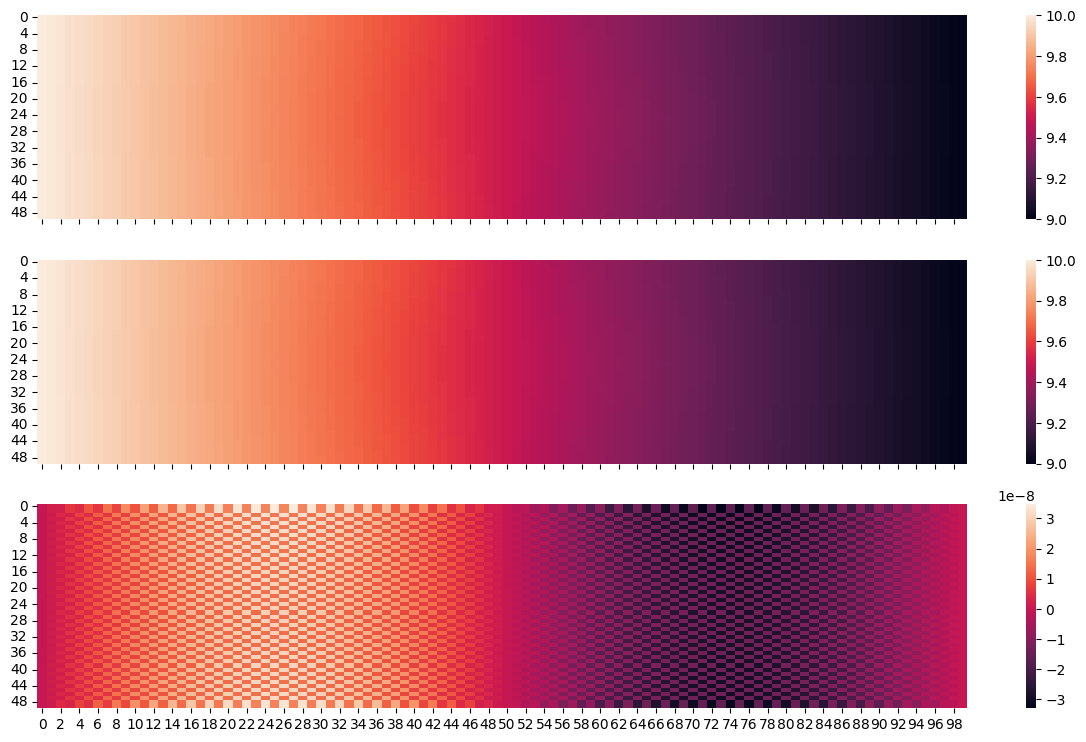

In [8]:
fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(15,9))

sns.heatmap(ns_grid.p[0].T, ax=axs[0])
sns.heatmap(ns_grid.p[999].T, ax=axs[1])
sns.heatmap(ns_grid.p[999].T - ns_grid.p[0].T, ax=axs[2])

plt.show()
